In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [2]:
survey_data = pd.read_csv('data/College Football Attendance Research.csv')
survey_data.head()

,Timestamp,Which is your favorite FBS college football team?,Which is conference is this team a member of?,Have you ever worked or been enrolled as a student at this school?,Have you ever been a season ticket holder at this school?,Have you attended a college football game in the past 5 years?,Please carefully select your 5 most important features at a college football game that would convince you to attend rather than watch on television. Please note they don't have to currently exist at your teams stadium.,What is your preferred kickoff time when attending a game?,Which stadium type do you prefer,Where do you prefer to watch a college football game,What is your age,What is your gender?,Optional - Please enter your email address if you would like to receive information about the findings.
0,2020/03/28 2:18:03 PM AST,Alabama,SEC,Yes,No,Yes,Lower ticket price;In-stadium social/common ar...,Early Evening (dusk),Open Air,At a tailgate,35-44,Male,NaN
1,2020/03/28 3:13:38 PM AST,Oklahoma State,Big 12,Yes,Yes,Yes,Lower ticket price;High quality opponent;Pre-g...,Early Evening (dusk),Dome,At an on-campus bar or restaurant,25-34,Male,NaN
2,2020/03/28 3:43:46 PM AST,Ohio State,Big Ten,Yes,Yes,Yes,Lower ticket price;Parking proximity to stadiu...,Afternoon,Open Air,At home,35-44,Male,NaN
3,2020/03/28 3:50:47 PM AST,Florida,SEC,No,No,Yes,Lower ticket price;High quality opponent;Team ...,Late Evening (night),Open Air,At an open air stadium,18-24,Male,mcgroarty.grattan@gmail.com
4,2020/03/28 4:30:21 PM AST,Iowa State,Big 12,No,No,Yes,High quality opponent;Modern in-stadium video ...,Early Evening (dusk),Open Air,At an open air stadium,Under 18,Male,NaN


In [3]:
survey_data.rename(columns = {'Which is your favorite FBS college football team?':'Team',
                     'What is your age':'Age',
                     'Where do you prefer to watch a college football game': 'Location',
                     'Which stadium type do you prefer' : 'Stadium',
                     'What is your preferred kickoff time when attending a game?': 'Kickoff',
                     'Have you attended a college football game in the past 5 years?':'Game',
                     'Have you ever been a season ticket holder at this school?':'Ticket', 
                     'Have you ever worked or been enrolled as a student at this school?':'Alum',
                     'What is your gender?':'Gender',
                     'Which is conference is this team a member of?':'Conference', 
                     "Please carefully select your 5 most important features at a college football game that would convince you to attend rather than watch on television. Please note they don't have to currently exist at your teams stadium.":'Features'}, 
                      inplace = True)

survey_data.head()

,Timestamp,Team,Conference,Alum,Ticket,Game,Features,Kickoff,Stadium,Location,Age,Gender,Optional - Please enter your email address if you would like to receive information about the findings.
0,2020/03/28 2:18:03 PM AST,Alabama,SEC,Yes,No,Yes,Lower ticket price;In-stadium social/common ar...,Early Evening (dusk),Open Air,At a tailgate,35-44,Male,NaN
1,2020/03/28 3:13:38 PM AST,Oklahoma State,Big 12,Yes,Yes,Yes,Lower ticket price;High quality opponent;Pre-g...,Early Evening (dusk),Dome,At an on-campus bar or restaurant,25-34,Male,NaN
2,2020/03/28 3:43:46 PM AST,Ohio State,Big Ten,Yes,Yes,Yes,Lower ticket price;Parking proximity to stadiu...,Afternoon,Open Air,At home,35-44,Male,NaN
3,2020/03/28 3:50:47 PM AST,Florida,SEC,No,No,Yes,Lower ticket price;High quality opponent;Team ...,Late Evening (night),Open Air,At an open air stadium,18-24,Male,mcgroarty.grattan@gmail.com
4,2020/03/28 4:30:21 PM AST,Iowa State,Big 12,No,No,Yes,High quality opponent;Modern in-stadium video ...,Early Evening (dusk),Open Air,At an open air stadium,Under 18,Male,NaN


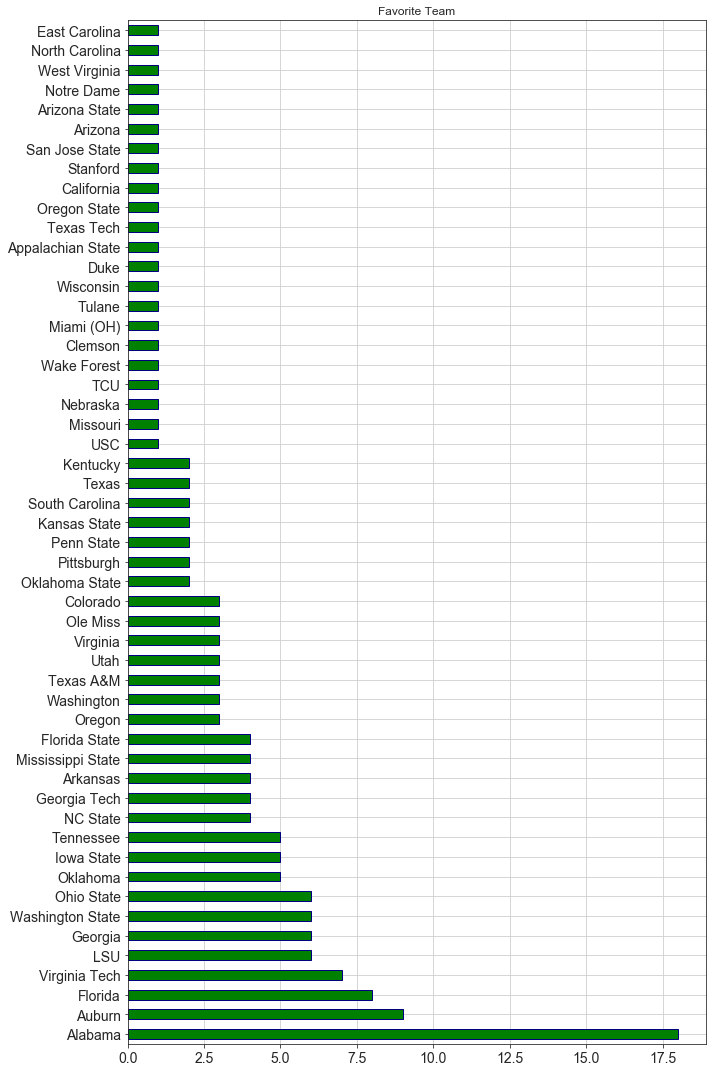

In [4]:
team = pd.Series(Counter(survey_data.Team.str.split(',').sum()))

team.sort_values(ascending=False, inplace=True)

team.plot(
    kind='barh',
    figsize=(10, 15),
    edgecolor='navy',
    color = 'g',
    fontsize=14,
    title='Favorite Team'
    ).yaxis.label.set_visible(True)

plt.grid()

plt.tight_layout()

plt.savefig('images/team.png')

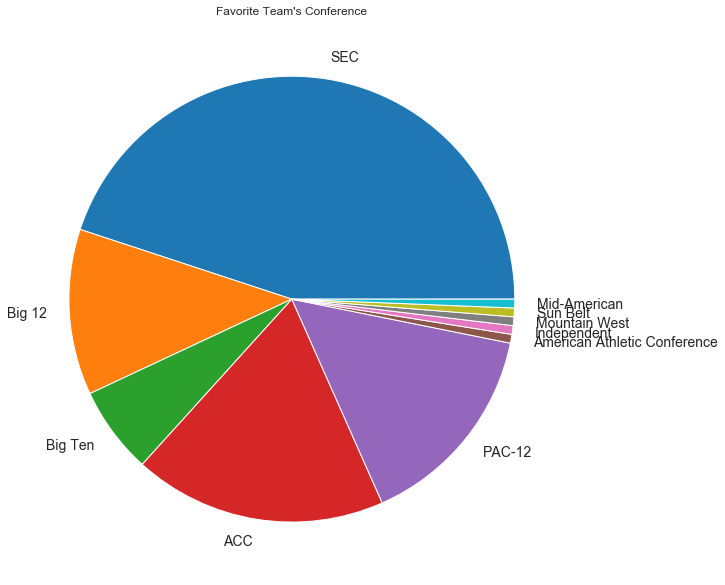

In [5]:
conference = pd.Series(Counter(survey_data.Conference.str.split(',').sum()))

conference.sort_values(ascending=False)

conference.plot(
    kind='pie',
    figsize=(10, 10),
    fontsize=14,
    title="Favorite Team's Conference"
    ).yaxis.label.set_visible(False)

plt.tight_layout()

plt.savefig('images/conference.png')

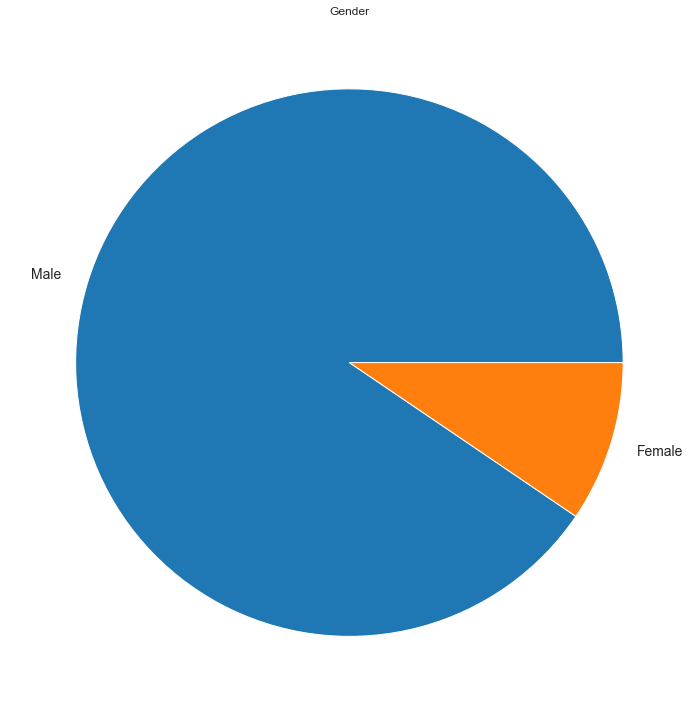

In [6]:
gender = pd.Series(Counter(survey_data.Gender.str.split(',').sum()))

gender.sort_values(ascending=False)

gender.plot(
    kind='pie',
    figsize=(10, 10),
    fontsize=14,
    title="Gender"
    ).yaxis.label.set_visible(False)

plt.tight_layout()

plt.savefig('images/gender.png')

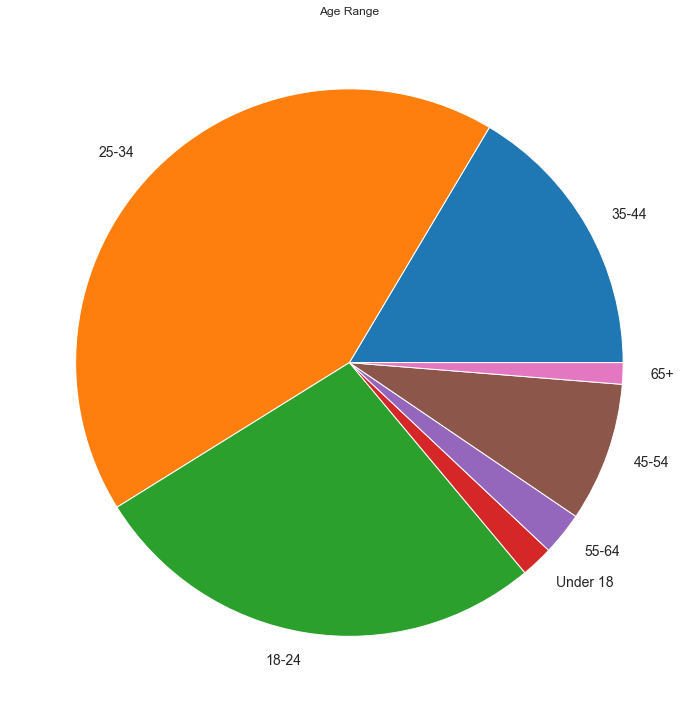

In [7]:
age = pd.Series(Counter(survey_data.Age.str.split(',').sum()))

age.sort_values(ascending=False)

age.plot(
    kind='pie',
    figsize=(10, 10),
    fontsize=14,
    title="Age Range"
    ).yaxis.label.set_visible(False)

plt.tight_layout()

plt.savefig('images/age.png')

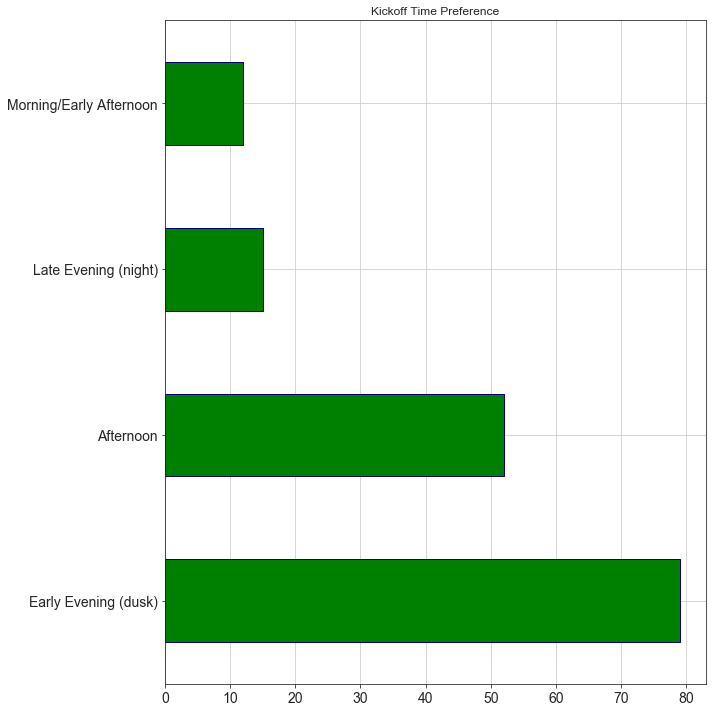

In [8]:
kickoff = pd.Series(Counter(survey_data.Kickoff.str.split(',').sum()))

kickoff.sort_values(ascending=False, inplace=True)

kickoff.plot(
    kind='barh',
    figsize=(10, 10),
    edgecolor='navy',
    color = 'g',
    fontsize=14,
    title='Kickoff Time Preference'
    ).yaxis.label.set_visible(True)

plt.grid()

plt.tight_layout()

plt.savefig('images/kickoff.png')

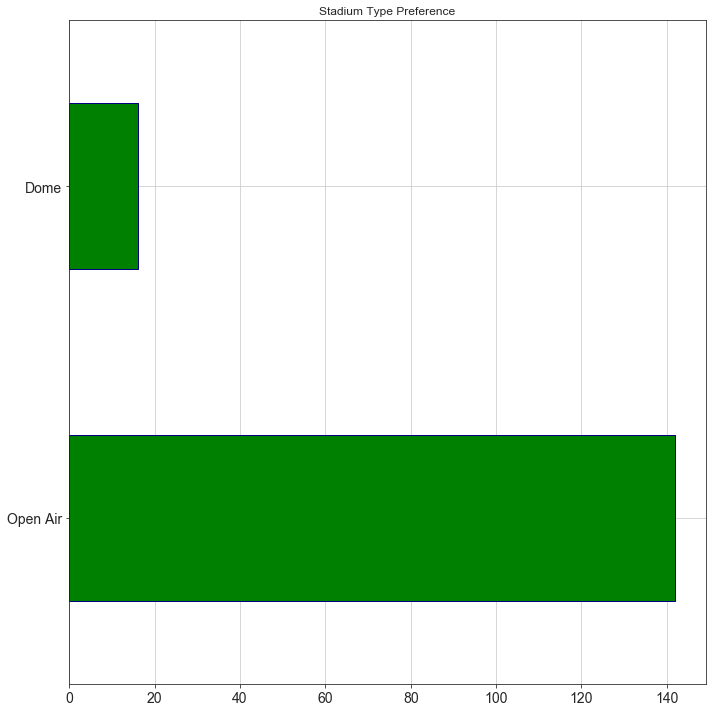

In [9]:
stadium = pd.Series(Counter(survey_data.Stadium.str.split(',').sum()))

stadium.sort_values(ascending=False, inplace=True)

stadium.plot(
    kind='barh',
    figsize=(10, 10),
    edgecolor='navy',
    color = 'g',
    fontsize=14,
    title='Stadium Type Preference'
    ).yaxis.label.set_visible(False)

plt.grid()

plt.tight_layout()

plt.savefig('images/stadium.png')

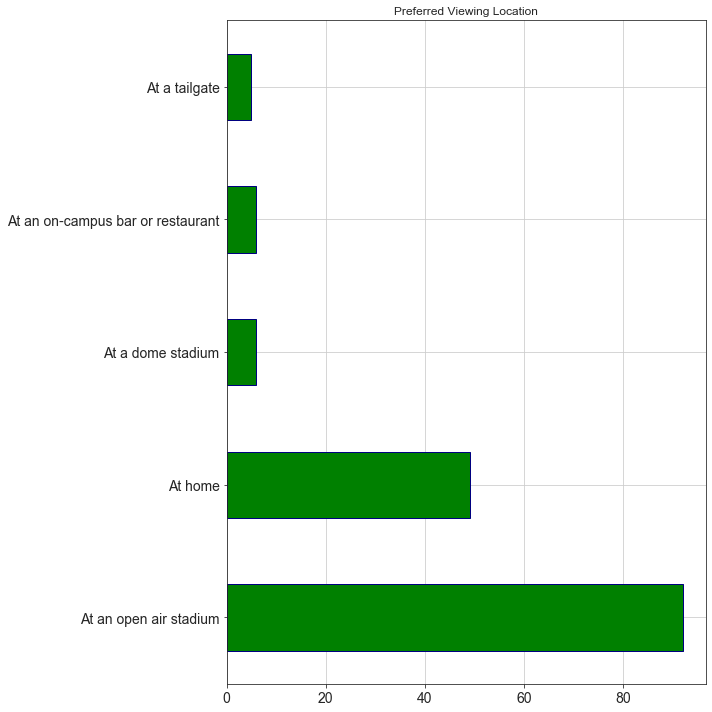

In [10]:
location = pd.Series(Counter(survey_data.Location.str.split(',').sum()))

location.sort_values(ascending=False, inplace=True)

location.plot(
    kind='barh',
    figsize=(10, 10),
    edgecolor='navy',
    color = 'g',
    fontsize=14,
    title='Preferred Viewing Location'
    ).yaxis.label.set_visible(True)

plt.grid()

plt.tight_layout()

plt.savefig('images/location.png')

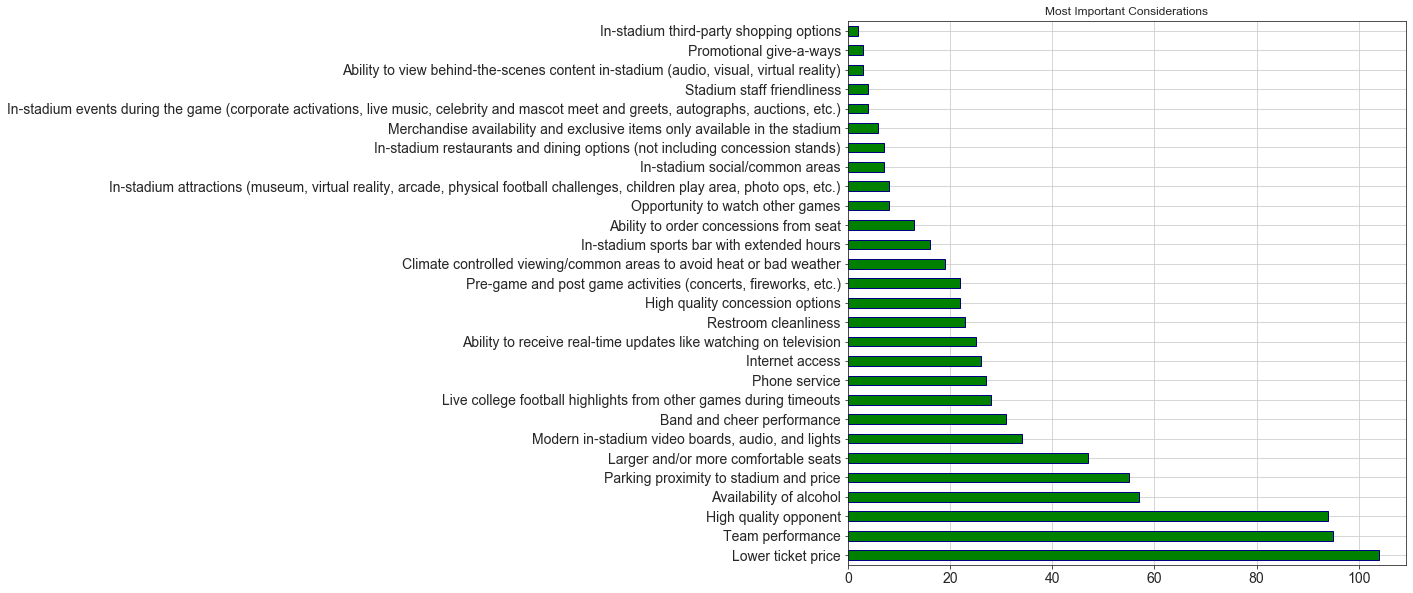

In [11]:
features = pd.Series(Counter(survey_data.Features.str.split(';').sum()))

features.sort_values(ascending=False, inplace=True)

features.plot(
    kind='barh',
    figsize=(10, 10),
    edgecolor='navy',
    color = 'g',
    fontsize=14,
    title='Most Important Considerations'
    ).yaxis.label.set_visible(True)

plt.grid()

plt.tight_layout()

plt.savefig('images/features.png')